# Allowed Libraries for Compressed Vector plotting

Even tho there is many libraries which will not allow a compressed vector as a parameter to plot, we can still use some of them which do not expect our vector to be numpy, and allows us to plot it without losing the compression.

## Altair

In [3]:
from cv_visualization import CompressedVector as cv
import numpy as np

original_vector = np.array([1.0, 2.0, 3.0, 4.0, 5.0], dtype=np.float32)

# first we build the compressed vector, using the decimal places and int width desired (and appropiate for it)
compressed_vector = cv(
    decimal_places=4,
    int_width=32
)

# then, we create the vector with the original data size
compressed_vector.create_vector(len(original_vector))

# fill the vector with the original data
compressed_vector.fill_from_vector(original_vector)

import altair as alt
import pandas as pd

# move the compressed vector a bit
for i in range(len(compressed_vector)):
    compressed_vector[i] += 0.5

# Prepare data for plotting
df = pd.DataFrame({
    'Index': range(len(original_vector)),
    'Original': original_vector,
    'Compressed': list(compressed_vector)
})

# Melt the dataframe for Altair
df_melted = df.melt(id_vars='Index', value_vars=['Original', 'Compressed'], var_name='Type', value_name='Value')

chart = alt.Chart(df_melted).mark_line(point=True).encode(
    x='Index:O',
    y='Value:Q',
    color='Type:N'
).properties(
    title='Original vs Compressed Vector'
).interactive()
chart = chart.properties(width=700, height=400)
chart




alt.Chart(...)

## PyGal

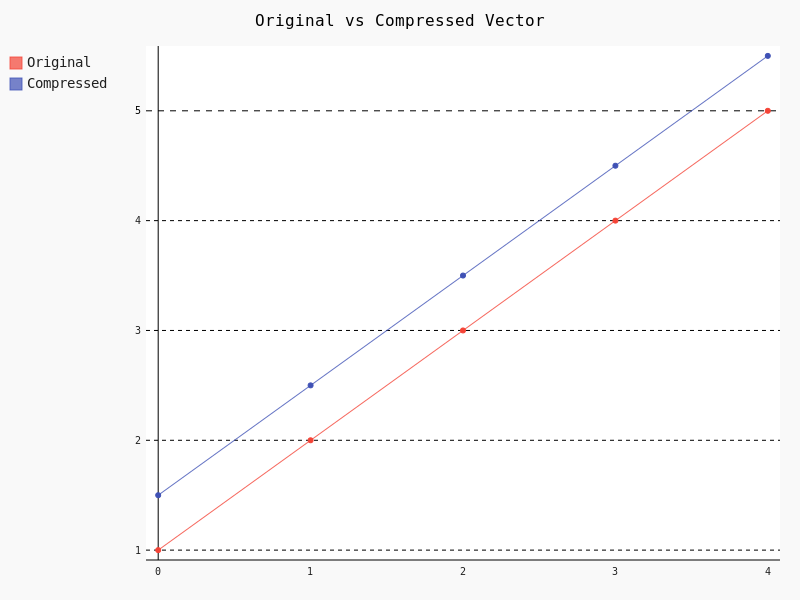

In [6]:
import pygal as pg

line_plot = pg.Line()
line_plot.title = 'Original vs Compressed Vector'
line_plot.x_labels = map(str, range(len(original_vector)))
line_plot.add('Original', original_vector)
line_plot.add('Compressed', list(compressed_vector))
line_plot